<a href="https://colab.research.google.com/github/Eseoy3002/ecg-hrv-analysis/blob/main/ecg_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic ECG Signal Analysis and Heart Rate Variability Visualization

This project simulates a basic ECG signal and performs simple analysis to detect R-peaks and calculate heart rate variability (HRV) metrics.

## Features
- Generates a synthetic ECG signal
- Detects R-peaks using peak finding algorithm
- Calculates mean RR interval and SDNN (standard deviation of RR intervals)
- Visualizes the ECG signal and detected peaks

## How to Run
Just run the code cell above to see the analysis and plot.

## Purpose
This project demonstrates basic signal processing and computational neuroscience concepts using Python. It is a starting point for analyzing physiological signals such as ECG and understanding brain-heart interactions.


Mean RR interval: 0.996 seconds
SDNN (HRV measure): 0.041 seconds


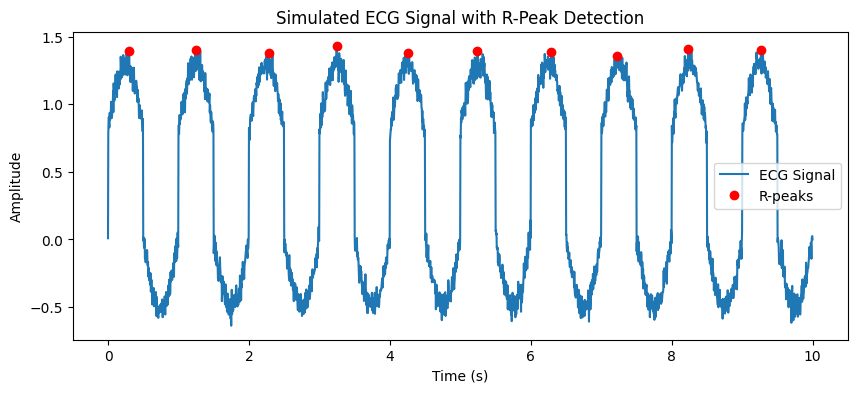

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def generate_ecg(duration=10, fs=250):
    t = np.linspace(0, duration, duration * fs)
    ecg_signal = 0.5 * np.sin(2 * np.pi * 1 * t) + 0.05 * np.random.randn(len(t))
    ecg_signal += (np.sin(2 * np.pi * 1 * t) > 0).astype(float) * 0.8
    return t, ecg_signal

def detect_r_peaks(ecg_signal, fs=250):
    peaks, _ = find_peaks(ecg_signal, distance=fs*0.6, height=0.6)
    return peaks

def calculate_hrv(r_peaks, fs=250):
    rr_intervals = np.diff(r_peaks) / fs
    mean_rr = np.mean(rr_intervals)
    sdnn = np.std(rr_intervals)
    return mean_rr, sdnn

def plot_ecg(t, ecg_signal, r_peaks):
    plt.figure(figsize=(10,4))
    plt.plot(t, ecg_signal, label='ECG Signal')
    plt.plot(t[r_peaks], ecg_signal[r_peaks], 'ro', label='R-peaks')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Simulated ECG Signal with R-Peak Detection')
    plt.legend()
    plt.show()

fs = 250
t, ecg_signal = generate_ecg(duration=10, fs=fs)
r_peaks = detect_r_peaks(ecg_signal, fs)
mean_rr, sdnn = calculate_hrv(r_peaks, fs)

print(f"Mean RR interval: {mean_rr:.3f} seconds")
print(f"SDNN (HRV measure): {sdnn:.3f} seconds")

plot_ecg(t, ecg_signal, r_peaks)
